# By : Shubham Pawar
## The Sparks Foundation
### Data Science And Business Analytics Intern
### Task 2 : Prediction using Unsupervised ML
#### Dataset : https://bit.ly/3kXTdox
#### This task requires us to predict the optimum number of clusters and represent it visually.

In [46]:
#data analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#datasets from sklearn
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns

In [47]:
#Filter all the warnings

import warnings

#Ignoring the warning messages

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment=None

In [49]:
#Load the Iris Dataset
iris_data=datasets.load_iris()

In [50]:

#Print and view the features and labels

print("Features: ", iris_data.feature_names)
print("Labels: ", iris_data.target_names)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


In [51]:

#extracting features and labels || loading dataset
features=pd.DataFrame(iris_data.data)
features.columns=iris_data.feature_names

labels=pd.DataFrame(iris_data.target)
labels.columns=['class']

df=pd.concat([features,labels],axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
df.shape

#The shape of the dataframe

(150, 5)

In [54]:
#Datatypes of all columns

df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                  int32
dtype: object

In [55]:
#find out missing values in the data frame

df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [56]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


To get a better insight; visualization of data is important.

<AxesSubplot:xlabel='sepal length (cm)', ylabel='class'>

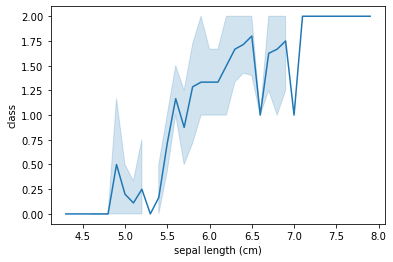

In [57]:
#Line plot
sns.lineplot(data=df, x="sepal length (cm)", y="class")

<AxesSubplot:xlabel='sepal width (cm)', ylabel='class'>

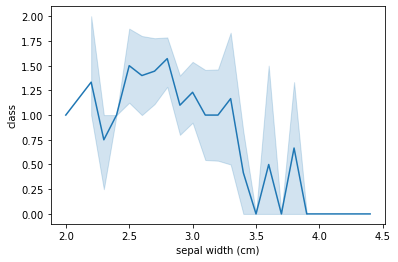

In [58]:
sns.lineplot(data=df, x="sepal width (cm)", y="class")

<AxesSubplot:xlabel='petal length (cm)', ylabel='class'>

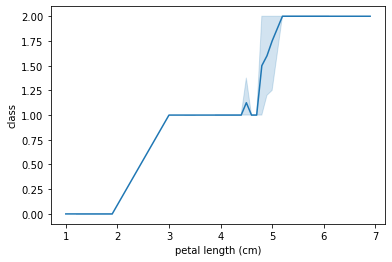

In [59]:
sns.lineplot(data=df, x="petal length (cm)", y="class")

<AxesSubplot:xlabel='petal width (cm)', ylabel='class'>

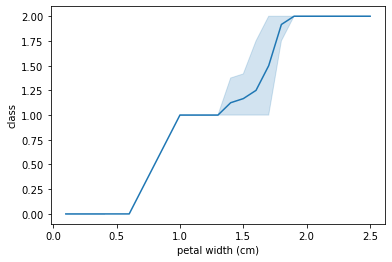

In [60]:
sns.lineplot(data=df, x="petal width (cm)", y="class")

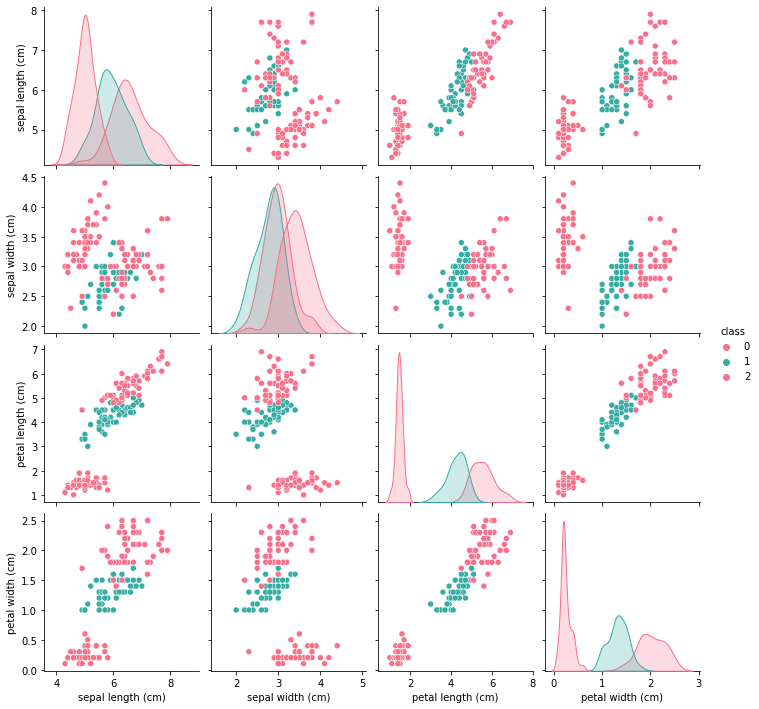

In [61]:
#Pairplot

sns.pairplot(df, hue = 'class',palette='husl')
plt.show()

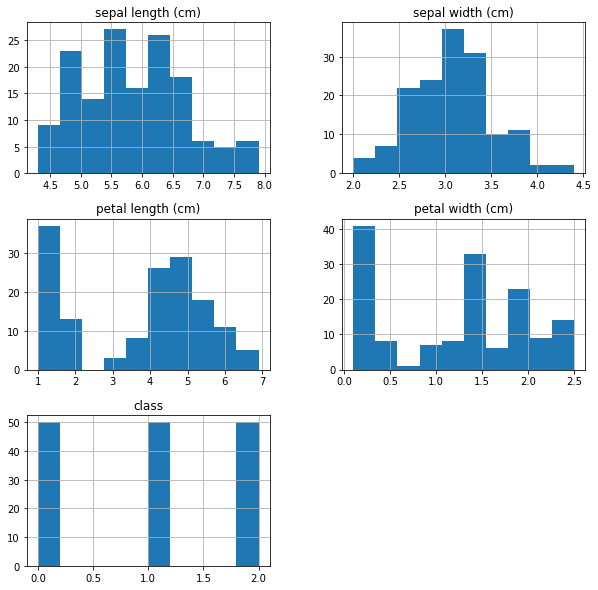

In [62]:
#HISTOGRAM

df.hist(figsize=(10,10))
plt.show()

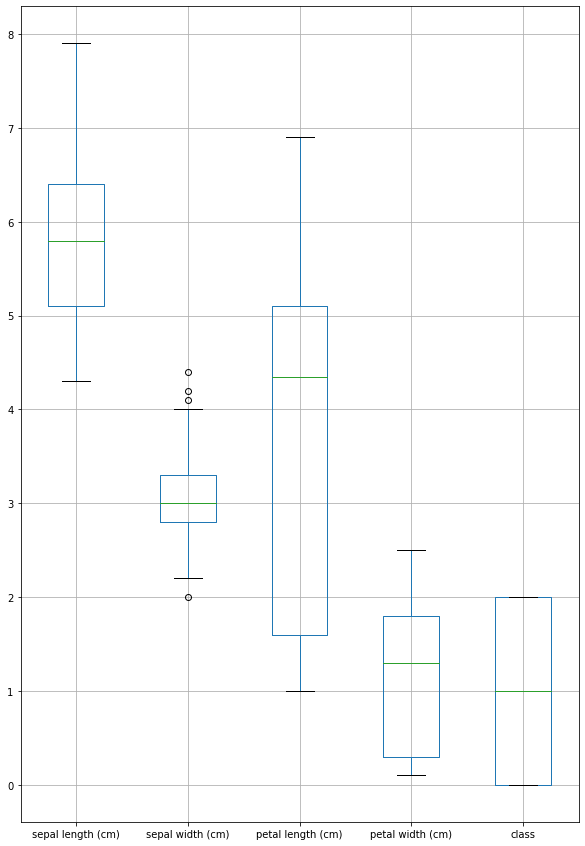

In [63]:
#BOXPLOT

df.boxplot(figsize=(10,15))
plt.show()

In [64]:
#Correlation Analysis

correlation = df.corr()
correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

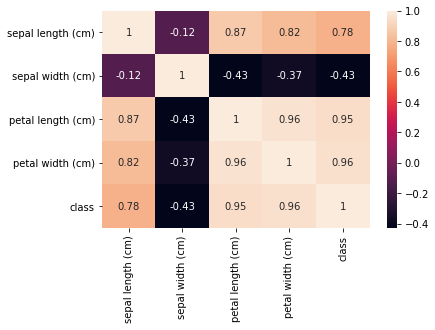

In [65]:
sns.heatmap(correlation, annot = True)

From the above correlation; we find that petal length has very high correlation with petal width and very low correlation with sepal width.

Similarly; sepal width has very low correlation with sepal length and petal width.

Hence we consider dropping off the columns 'Petal length' and 'Sepal Width'

In [66]:
df=df.drop(['petal length (cm)'],axis=1)   # remove 'petal length (cm)' column from df dataset
df=df.drop(['sepal width (cm)'],axis=1)   # remove 'sepal width (cm)' column from df dataset

In [67]:
#viewing the correlation after data cleaning

correlation = df.corr()
correlation

,sepal length (cm),petal width (cm),class
sepal length (cm),1.000000,0.817941,0.782561
petal width (cm),0.817941,1.000000,0.956547
class,0.782561,0.956547,1.000000


### Determine the value of k -> using Elbow Method

In [68]:
inertia_list = []
for num_clusters in np.arange(1, 21):
    kmeans =KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

In [69]:
inertia_list

[288.7382666666666,
 89.49827546296302,
 44.26663769507807,
 31.888299178981924,
 22.264852380952398,
 18.34673863636364,
 14.519,
 12.779702548256902,
 10.95447205572205,
 9.474780144372533,
 8.045292049134439,
 7.249567329409716,
 6.368528867871256,
 5.640721139971143,
 5.279075646575646,
 4.672699494949496,
 4.2806286929444815,
 4.087922147297145,
 3.880355301131616,
 3.6360707070707052]

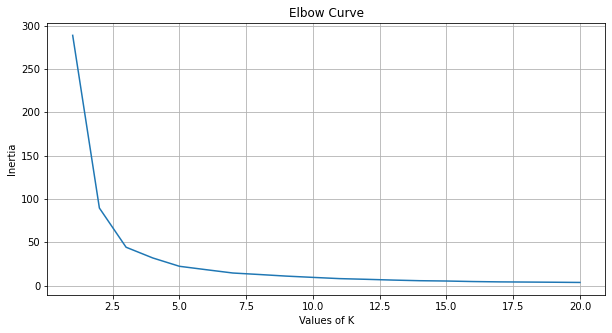

In [70]:
#Plotting the Elbow Curve

plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

From above, we select the optimum value of k by determining the Elbow Point - a point after which the inertia starts decreasing linearly. In this case, we can select the value of k as 3.

### Implementing K-means using scikit learn

In [72]:
dfx = df[['sepal length (cm)','petal width (cm)']]
dfy = df['class']

In [73]:
#Here, we are taking the value of k as 3 as found above

kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(dfx)

In [74]:
#printing the centroids of each cluster

centroids = kmeans.cluster_centers_
centroids

array([[6.84318182, 1.98409091],
       [5.00555556, 0.3037037 ],
       [5.86730769, 1.46538462]])

In [75]:
#Sum of squared distances of data-points to their closest cluster center. It tells us how well the formed clusters are
kmeans.inertia_

32.72652615902616

In [76]:
x=dfx.values
y=dfy.values

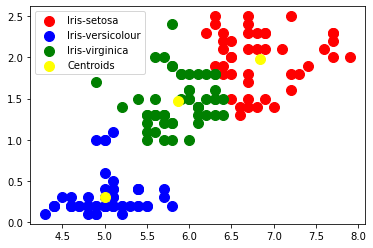

In [77]:
# Visualising the 3 clusters
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()